# Python for Scientific Data Analysis


#    Matplotlib

## Section 4: 3D Plots and Images 


In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=[12,8]

Shaded regions are often used to identify confidence intervals and other similar statistical quantities.  In the example below, we use _fill\_between_ to plot the `variance of the predicted response'.   Note: this is the correct version of what is shown in the _matplotlib_ documentation on _fill\_between_ (which has the wrong equation!).  


### 3D Plots

Now we will briefly discuss 3-D plots.   Originally, Matplotlib was designed with only two-dimensional plotting in mind.   But often data are more useful to display in 3D.   Getting Matplotlib to do 3D plotting meant adding functions to the core Matplotlib capability.   To enable,  3-D plotting capabilities 
 you need to iport the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [2]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

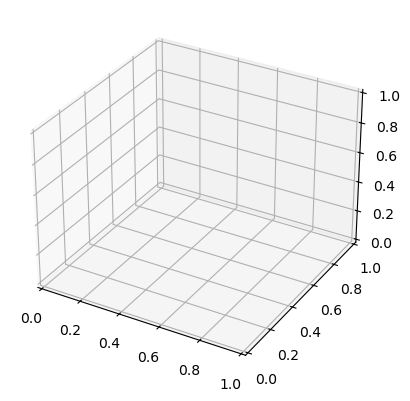

In [3]:
fig = plt.figure()
ax=plt.axes(projection='3d')

#ax = plt.axes(projection='3d')
#fig,ax=plt.subplots()
#axes=plt.ax(projection='3d')

Note that the call here is a little weird compared to what you may be used to, especially if you like the fig,axes containers (which I do).

What if you want to create two (or any number of) 3D plot panels on the same figure?   Do the following:

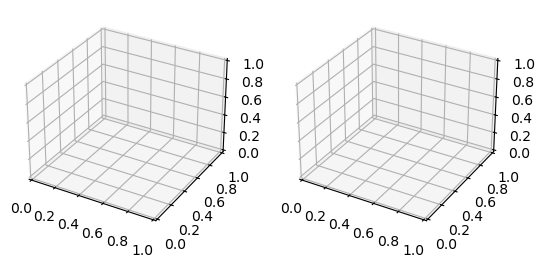

In [4]:
fig=plt.figure()

# set up the axes for the first plot

ax = fig.add_subplot(1, 2, 1, projection='3d')
#add stuff to plot data

#and the second

ax = fig.add_subplot(1, 2, 2, projection='3d')
#add stuff to plot data

Note here that (as a reminder?) the ``add_subplot[stuff]`` syntax is ``add_subplot(nrows,ncols,index)``.  E.g. if we wanted two plots vertically stacked we would do:

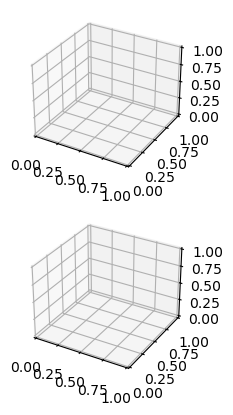

In [5]:
fig=plt.figure()

# set up the axes for the first plot

ax = fig.add_subplot(2, 1, 1, projection='3d')
#add stuff to plot data

#and the second

ax = fig.add_subplot(2, 1, 2, projection='3d')
#add stuff to plot data

Okay, now let's do a bunch of examples ...

## 1. Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts.

Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

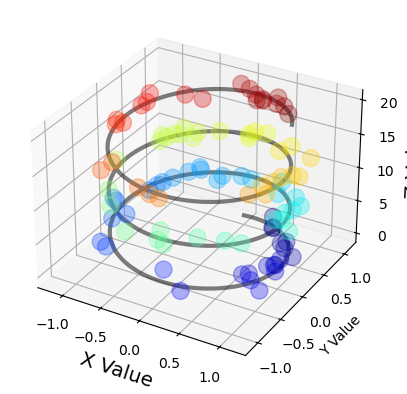

In [6]:
fig = plt.figure()
ax=plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 20, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'black',lw=3,alpha=0.5)

# Data for three-dimensional scattered points
zdata = 20 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet',s=150,alpha=0.3,marker='o')
ax.set_xlabel('X Value',fontsize='x-large')
ax.set_ylabel('Y Value',fontsize='medium')
ax.set_zlabel('Z Value',fontsize='x-large');

See how that worked? the basic calls are very similar to those for a 2D line plot and 2D scatter plot.  The key addition is this "3D" suffix added on to our normal function calls.

## 2. Three-dimensional Contour Plots

Analogous to the contour plots we explored above, ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

Text(0.5, 0, 'Z')

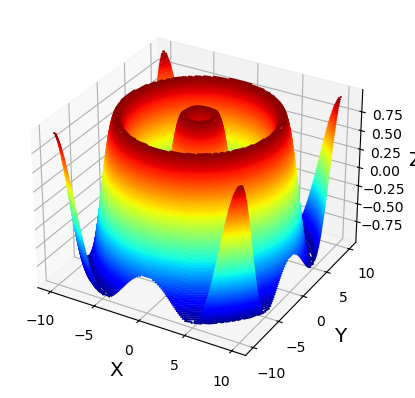

In [7]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='jet')

#bunch of formatting
ax.set_xlabel('X',fontsize='x-large')
ax.set_ylabel('Y',fontsize='x-large')
ax.set_zlabel('Z',fontsize='x-large')

Now, this looks pretty cool.  Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 50 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 30 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis) and then an elevation of 10 degrees and azimuth of 40 degrees:

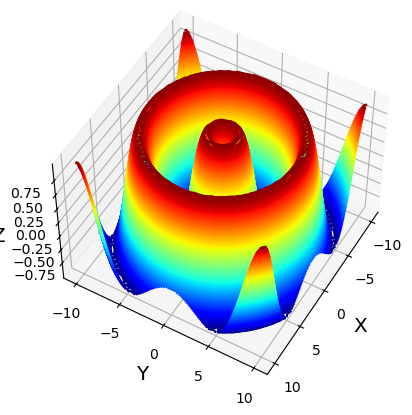

In [8]:
ax.view_init(50, 30)
#ax.view_init(-90, 30)
fig


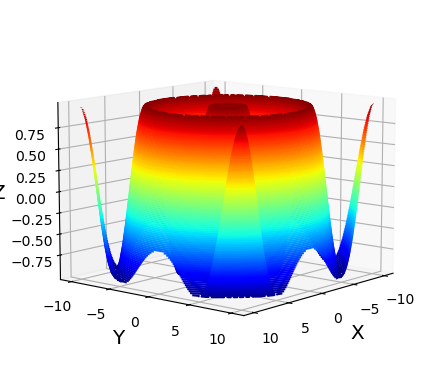

In [9]:
#10, 40

ax.view_init(10,40)
fig

## 3. Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

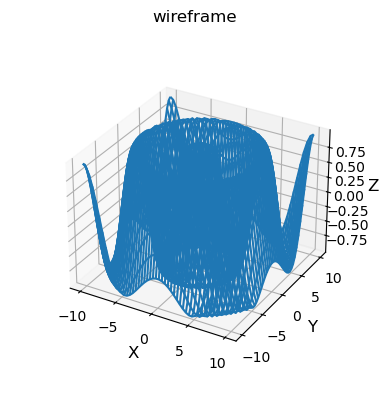

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='tab:blue')
#bunch of formatting
ax.set_xlabel('X',fontsize='large')
ax.set_ylabel('Y',fontsize='large')
ax.set_zlabel('Z',fontsize='large');
ax.set_title('wireframe')

#note: if the labels are being cut off then do this ...
ax.set_box_aspect(aspect=None, zoom=0.8)

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

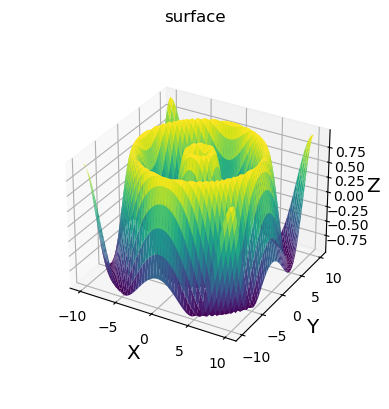

In [11]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('X',fontsize='x-large')
ax.set_ylabel('Y',fontsize='x-large')
ax.set_zlabel('Z',fontsize='x-large');
ax.set_title('surface');
#ax.view_init(15,130) #if you want to change the default viewing angle

ax.set_box_aspect(aspect=None, zoom=0.8)
fig;

Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_59780/4124650115.py", line 15, in <module>
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
                               ^^^^^^^^^^^^^^^^
NameError: name 'AutoMinorLocator' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/IPython/core/ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^

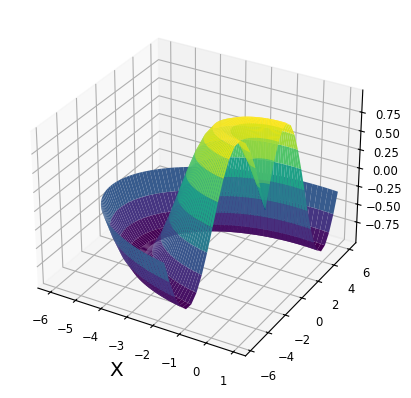

In [12]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.05 * np.pi, 90)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');ax.set_xlabel('X',fontsize='x-large')
ax.tick_params(which='both',direction='out',width=2,labelsize='small')
ax.tick_params(which='major',length=7)
ax.tick_params(which='minor',length=3.5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.zaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel('Y',fontsize='x-large')
ax.set_zlabel('Z',fontsize='x-large')
ax.set_box_aspect(aspect=None, zoom=0.8);

Note from the markups above, you can apply many of the same axes formattings that you previously used in a 2D plot.

### Images

Displaying images and then overplotting or manipulating them in various ways is another key capability of _matplotlib_.   The examples given in most _matplotlib_ documentation are a bit too simple to be useful for us.  But this capability is critical for astronomy/astrophysics: now, I would say 80+% of the figures displaying images in my papers are derived from _matplotlib_ code.  To go from some FITS image (if you don't know the term, you will soon) to a nice polished Python _matplotlib_-produced figure also usually involves the _**astropy**_ package to read in the data as an array _matplotlib_ can handle. We will get to that later (use Google if you want to jump ahead).  For now, assume the commands calling _astropy_ functions are correct.

The key command for image display is _**plt.imshow()**_ (or _**axes.imshow()**_ for the axes container).   Important keywords for _imshow_ include:

-  _origin_ (e.g. ``axes.imshow(image,origin='lower')).  By default, the origin is at the top (origin ='upper'): images displayed appear upside-down compared to how they appear elsewhere (e.g. with DS9).  I always set origin='lower'.
-  _cmap_ - which colormap do you use? See possibilities within _matplotlib_ here: [https://matplotlib.org/stable/tutorials/colors/colormaps.html]()
-  _clim_ - what are the z value limits (i.e. for an image, this is the pixel intensity/count value) -- minimum and maximum?  (cmin,cmax).  E.g. ``axes.imshow(image,clim=(1,100))`` for a color stretch going from a minimum of 1 and maximum of 100.
-  _norm_ - if you do nothing, the image stretch is linear, but you can do other stretches.  E.g. for a logarithimic color scale do ``axes.imshow(image,norm=LogNorm())``

Now, normally, when you use _imshow_ the x and y coordinates listed are pixel coordinates.  You can change this by reading in the World Coordinate System information from your FITS header (wcs=WCS(header)), re-defining the _projection_ in the ``plt.subplots()`` call, and then setting the subplot keyword dictionary to include `projection` = wcs.  E.g. ``fig,axes=plt.subplots(subplot_kw={'projection':wcs})``.  

Below is a simple example to read in a Hubble Space Telescope image of AB Aurigae:

In [17]:
#ex_3_8
from matplotlib.ticker import AutoMinorLocator

def ex3_8():
 from matplotlib.colors import LogNorm

 from astropy.io import fits
 from astropy.wcs import WCS

 hst_stis=fits.open('./sect3/files/stisabaurcomball.fits')[0]
 image=hst_stis.data

 wcs=WCS(hst_stis.header)

 imdim=image.shape
 center=np.array(imdim)//2

# x,y=np.meshgrid(imdim,imdim) #not needed

 #fig,axes=plt.subplots(figsize=(10,8)) #x and y coordinates
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(10,8))


 windowsize=75
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.tick_params(which='both',width='1.5',labelsize='large')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.xaxis.set_ticks_position('both')
 axes.yaxis.set_ticks_position('both')
 axes.set_xlabel('Right Ascension',fontsize=16)
 axes.set_ylabel('Declination',fontsize=16)

 axes.imshow(image,origin='lower',norm=LogNorm(),clim=(.5,1000),cmap='jet')




a string value was expected. [astropy.wcs.wcs]


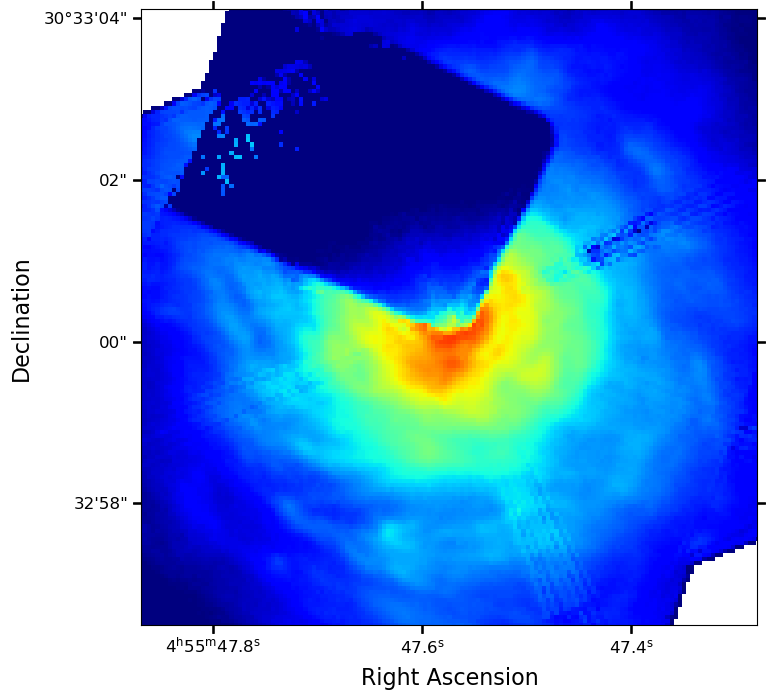

In [18]:
ex3_8()

And here is an example where we overplot a contour plot and add a title and colorbar to the HST image:

In [21]:
def ex3_9():

 from matplotlib.colors import LogNorm

 from astropy.io import fits
 from astropy.wcs import WCS
 hst_stis=fits.open('./sect3/files/stisabaurcomball.fits')[0]
 image=hst_stis.data

 wcs=WCS(hst_stis.header)

 imdim=image.shape
 center=np.array(imdim)//2
 print(center)

# x,y=np.meshgrid(imdim,imdim)
# print('x is',x)

 #fig,axes=plt.subplots(figsize=(10,8)) #x and y coordinates
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(15,12))


 windowsize=75
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.tick_params(which='both',width='1.5',labelsize='large')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.xaxis.set_ticks_position('both')
 axes.yaxis.set_ticks_position('both')
 axes.set_xlabel('Right Ascension',fontsize=16)
 axes.set_ylabel('Declination',fontsize=16)

 axes.imshow(image,origin='lower',norm=LogNorm(),clim=(.5,1000),cmap='jet')

 levels=np.logspace(np.log10(1),np.log10(1000),10)
 imagecontour=axes.contour(image,levels,linestyles='-',colors='white')

 axes.clabel(imagecontour,imagecontour.levels,inline=True,fontsize=11,colors='black')


 norm=LogNorm(levels.min(),levels.max())
 sm=plt.cm.ScalarMappable(cmap='jet',norm=norm)
 sm.set_clim(vmin=0.5,vmax=1000)
 sm.set_array([])
 #fig.colorbar(sm,ticks=(levels[0],100,1000),cax=axes,cmap='jet',format='%d')
 #cax=ax.inset_axes([0.95, 0.1, 0.05, 0.8])   
 cb=fig.colorbar(sm,ticks=(levels[0],100,1000),ax=plt.gca(),cmap='jet',format='%d')  
 cb.ax.tick_params(labelsize=14)   
 #fig.colorbar(sm,ticks=(levels[0],100,1000),cmap='jet',format='%d')

 axes.set_title('AB Aurigae, with Contours',fontsize=16,fontweight='bold',pad=15)

a string value was expected. [astropy.wcs.wcs]


[201 201]


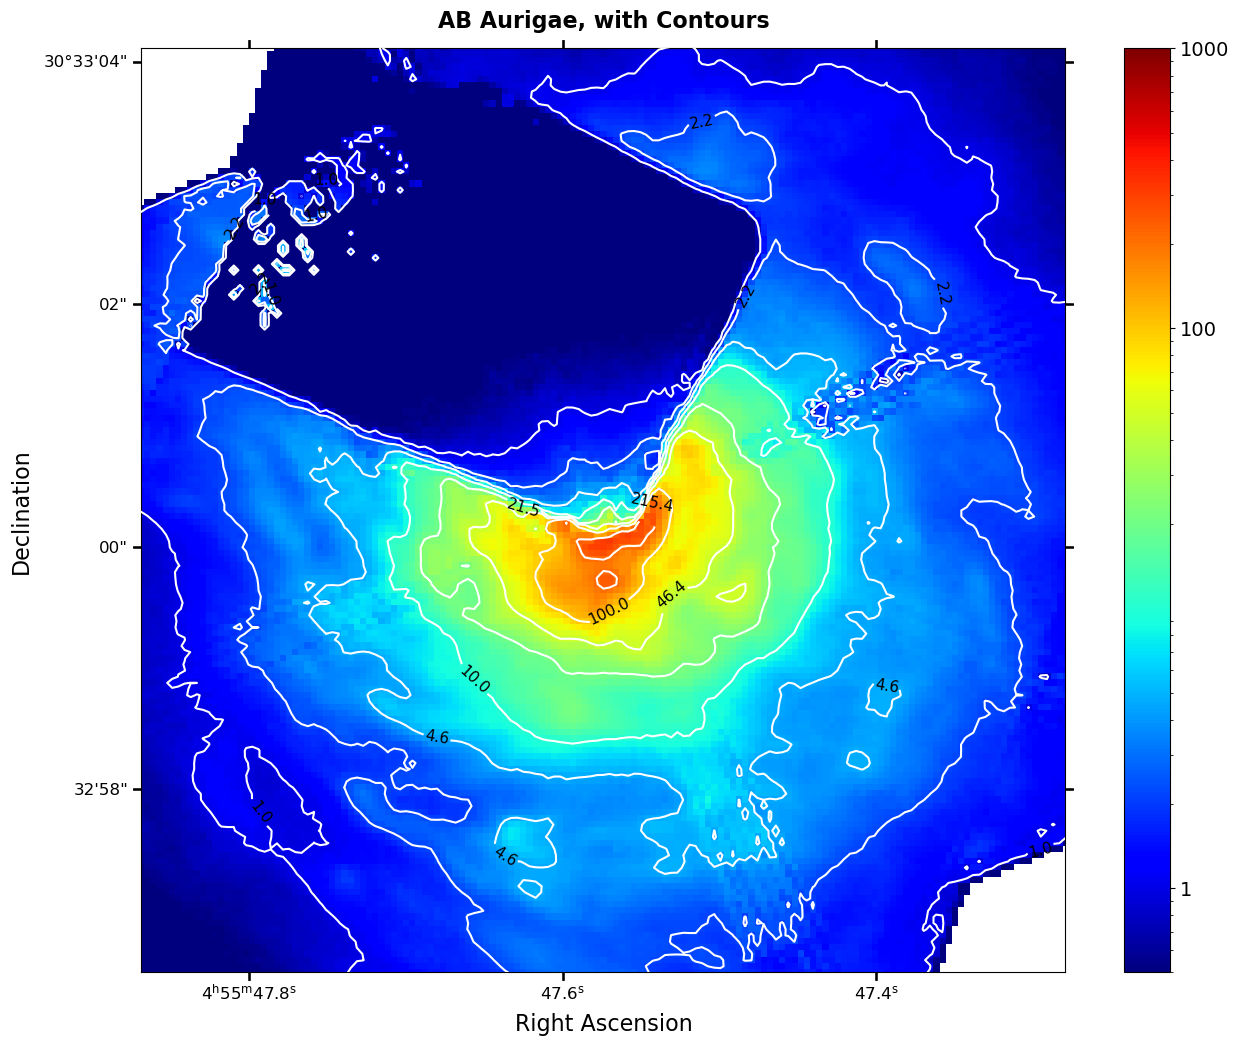

In [22]:
ex3_9()